<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea9_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pygam

In [ ]:
pip install graphviz

In [60]:
import numpy as np
import pandas as pd        
from pygam import LogisticGAM
from matplotlib import pyplot as plt
from sklearn.metrics import (roc_curve, roc_auc_score, confusion_matrix, accuracy_score, f1_score, precision_recall_curve) 
from sklearn.model_selection import train_test_split

In [61]:
df = pd.read_csv('spamlog.csv')
#df = df.assign(const=1)
X = df[['make','address','all','3d','our','over','remove','internet','order','mail','receive','will','people','report','addresses','free','business','email','you','credit','your','font','a000','money','hp','hpl','george','n650','lab','labs','telnet','n857','data','n415','n85','technology','n1999','parts','pm','direct','cs','meeting','original','project','re','edu','table','conference','semicolon','parenthesis','bracket','admiration','dolar','cnum','averange','longest','total']] ## Predictors

#Xalpha = df[['our','over','remove','internet','free','business','hpl','admiration','dolar','longest','total','hp','george','n1999','re','edu']] ## Predictors
y = df['spam']

## Crea conjuntos de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.66, random_state = 5)

df.sample(5)
df.describe()

,make,address,all,3d,our,over,remove,internet,order,mail,receive,will,people,report,addresses,free,business,email,you,credit,your,font,a000,money,hp,hpl,george,n650,lab,labs,telnet,n857,data,n415,n85,technology,n1999,parts,pm,direct,cs,meeting,original,project,re,edu,table,conference,semicolon,parenthesis,bracket,admiration,dolar,cnum,averange,longest,total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,-0.855538,-0.855235,-0.671553,-0.988476,-0.682848,-0.862240,-0.871168,-0.876519,-0.881656,-0.762145,-0.907110,-0.513370,-0.874048,-0.942609,-0.948067,-0.774623,-0.841563,-0.815306,-0.099043,-0.928423,-0.421103,-0.964357,-0.884788,-0.888511,-0.717658,-0.814299,-0.788350,-0.902189,-0.926808,-0.909474,-0.943349,-0.959313,-0.923473,-0.958151,-0.907933,-0.898095,-0.852540,-0.988871,-0.928749,-0.932068,-0.968831,-0.924088,-0.943388,-0.942910,-0.756571,-0.889453,-0.992974,-0.968741,-0.940534,-0.734568,-0.964453,-0.685899,-0.867115,-0.942513,0.433877,1.207706,1.970034,0.394045
std,0.302162,0.347460,0.433158,0.136080,0.452831,0.293704,0.314414,0.300145,0.289940,0.418746,0.240259,0.525916,0.291476,0.227790,0.214337,0.416038,0.343063,0.382176,0.651456,0.259020,0.598063,0.239173,0.302538,0.284147,0.544127,0.428609,0.529725,0.315604,0.273287,0.292692,0.233949,0.201389,0.275132,0.203201,0.293194,0.291016,0.341671,0.101728,0.258353,0.237142,0.186712,0.299016,0.212641,0.240346,0.441653,0.346338,0.074659,0.166579,0.179393,0.284249,0.123761,0.402171,0.249682,0.182600,0.316588,0.625444,0.674189,0.488698
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.041393,0.041393,0.041393,0.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.227372,0.785330,1.545307,0.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.698970,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.149219,-1.000000,-0.494850,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.782516,-1.000000,-1.000000,-1.000000,-1.000000,0.375846,1.178977,1.978181,0.000000
75%,-1.000000,-1.000000,-0.283997,-1.000000,-0.318759,-1.000000,-1.000000,-1.000000,-1.

In [62]:
#Fit a model with the default parameters
X_train1 = X_train[['our','over','remove','internet','free','business','hpl','admiration','dolar','longest','total','hp','george','n1999','re','edu']]
X_test1 = X_test[['our','over','remove','internet','free','business','hpl','admiration','dolar','longest','total','hp','george','n1999','re','edu']]
gam = LogisticGAM().fit(X_train1, y_train)

In [63]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     76.9424
Link Function:                        LogitLink Log Likelihood:                                  -199.6744
Number of Samples:                         1564 AIC:                                              553.2335
                                                AICc:                                               561.52
                                                UBRE:                                               2.3931
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.8083
Feature Function                  Lam

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


In [64]:
gam.accuracy(X_test1, y_test)

0.9315113598946329

In [65]:
#compute confussion matrix 
confussion_matrix = confusion_matrix(y_test, gam.predict(X_test1))
confussion_matrix

array([[1742,   83],
       [ 125, 1087]])

<Figure size 432x288 with 0 Axes>

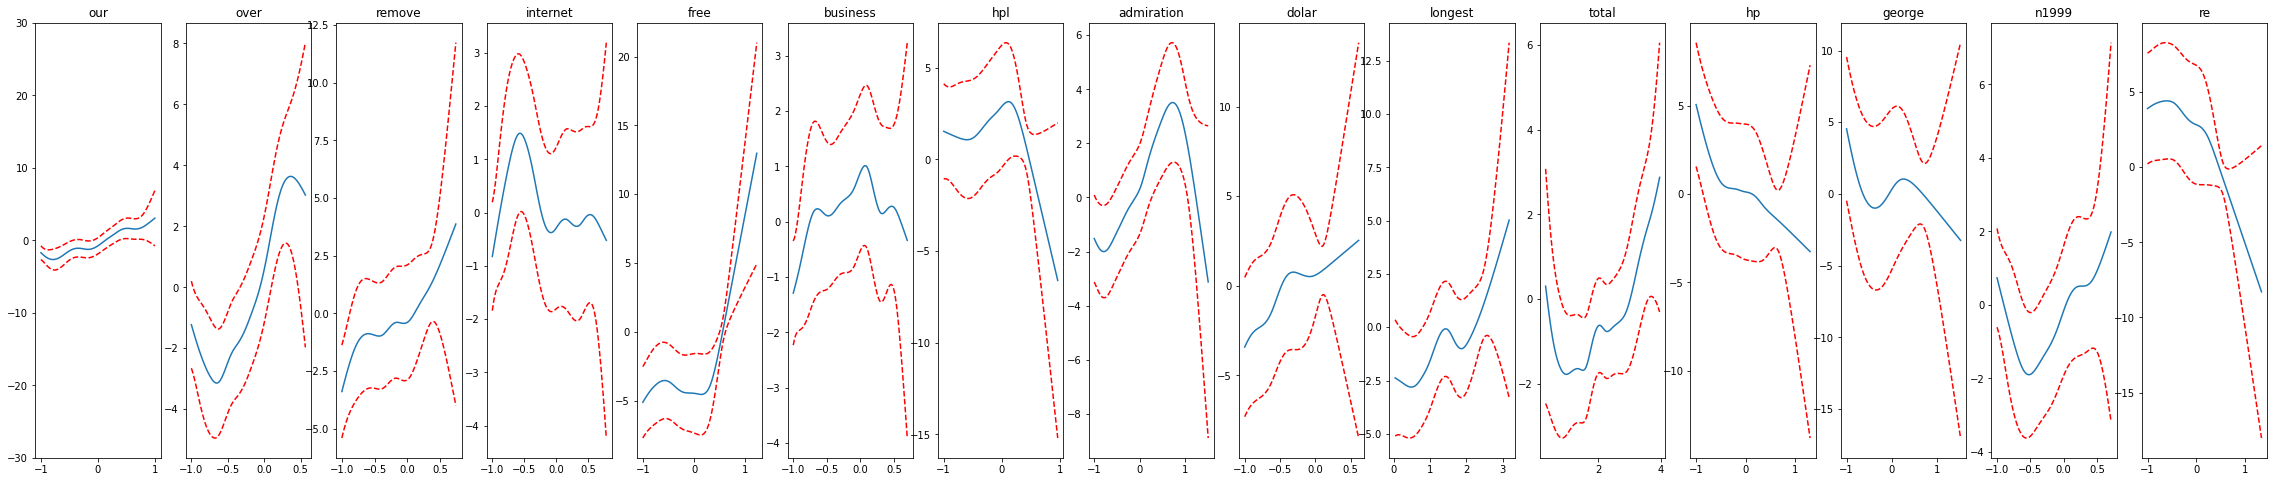

In [66]:
titles = X_test1.columns[0:16]
plt.figure()
fig, axs = plt.subplots(1, 15,figsize=(40, 8))

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX,   width=.95)[1], c='r', ls='--')
    
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])
    
plt.show()

## Árboles de decisión

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


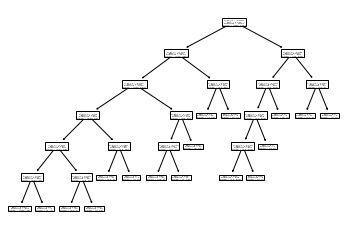

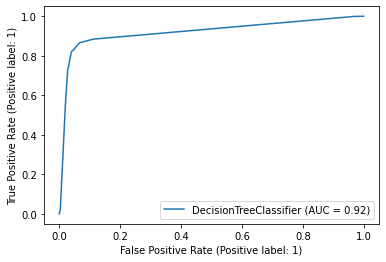

In [67]:
from sklearn import datasets, metrics, model_selection, svm
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_leaf_nodes=17)
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)
metrics.plot_roc_curve(clf, X_test, y_test) 
plt.show()

In [68]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("spam") 

'spam.pdf'

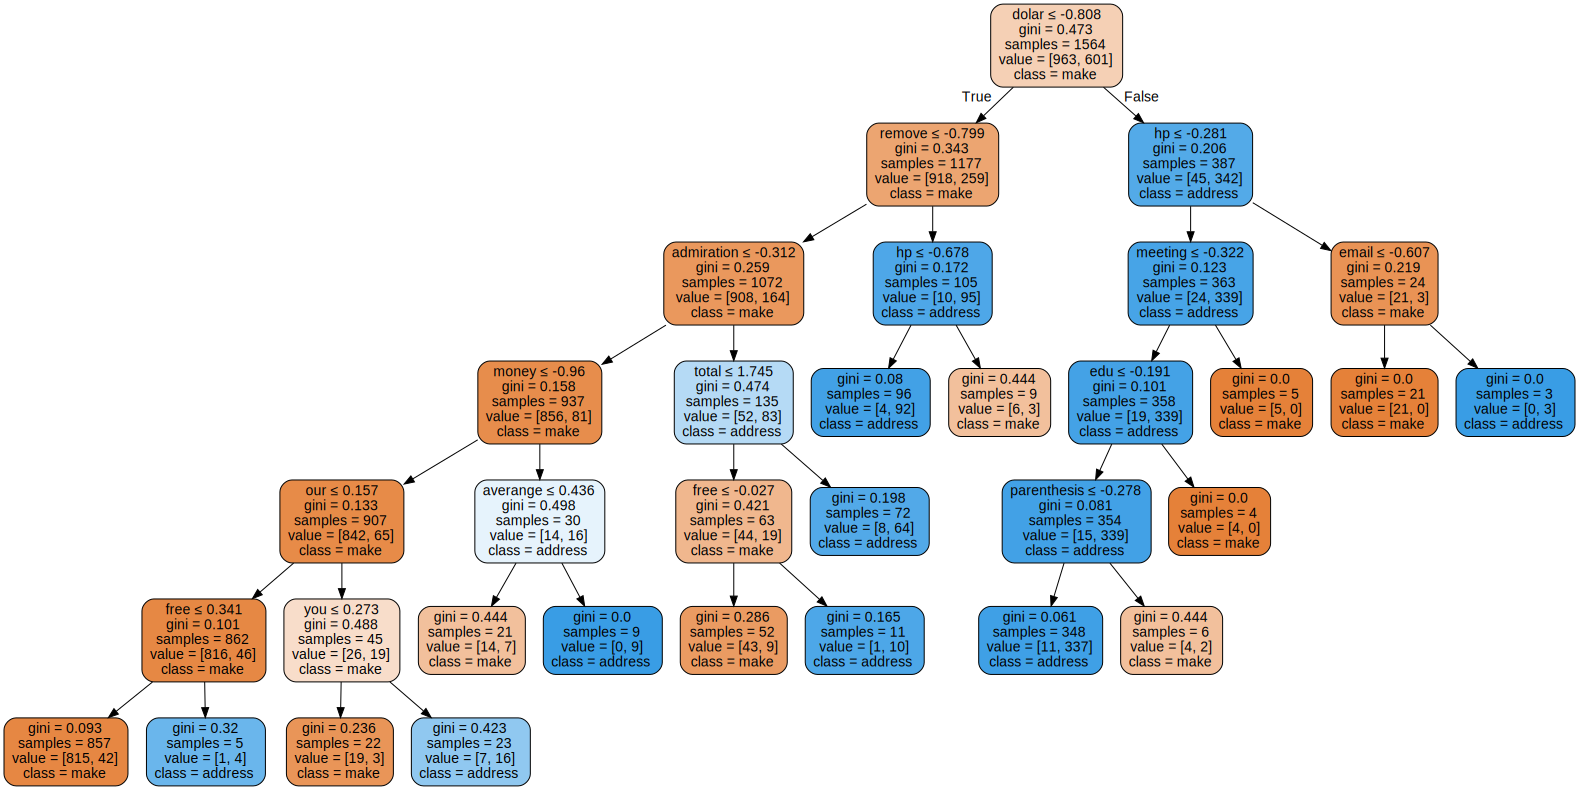

In [69]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X_test.columns.values.tolist(),
                                class_names=X_test.columns.values.tolist(),
                                filled=True, 
                                rounded=True, 
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [70]:
#compute confussion matrix 
confussion_matrix = confusion_matrix(y_test, clf.predict(X_test))
confussion_matrix

array([[1728,   97],
       [ 191, 1021]])

[A Tour of pyGAM](https://pygam.readthedocs.io/en/latest/notebooks/tour_of_pygam.html)

[A example of pyGAM](https://codeburst.io/pygam-getting-started-with-generalized-additive-models-in-python-457df5b4705f)

[documentación pyGAM](https://pygam.readthedocs.io/en/latest/)

[pyGAM : Getting Started with Generalized Additive Models in Python](https://codeburst.io/pygam-getting-started-with-generalized-additive-models-in-python-457df5b4705f)

[Building interpretable models with Generalized additive models in Python](https://medium.com/just-another-data-scientist/building-interpretable-models-with-generalized-additive-models-in-python-c4404eaf5515)

[Scikit Decision Trees](https://scikit-learn.org/stable/modules/tree.html)

[Post pruning decision trees with cost complexity pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py)

[Understanding the decision tree structure](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py)